### Question: Write a program to develop Principal Component Analysis and Linear Discriminant Analysis

# Principal Component Analysis (PCA)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [52]:
def pca(dataset):
    mean = np.mean(dataset, axis =0)
    data_centered = dataset - mean
    cov_matrix = np.cov(data_centered.T)
    eigenvals, eigenvecs = np.linalg.eig(cov_matrix)
    i= np.argsort(eigenvals)[::-1]
    eigenvecs = eigenvecs[:,i]
    eigenvals= eigenvals[i]
    return(eigenvals, eigenvecs, mean)

In [53]:
iris_data = pd.read_csv("Iris.csv")
iris_data.drop("Id", inplace=True, axis=1)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
data = np.array(iris_data.drop("Species", axis=1))
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [55]:
iris_eigvals, iris_eigvecs, iris_mean = pca(data)
print("Mean: ", iris_mean)
print("Eigenvalues: ", iris_eigvals)
print("Eigenvectors: ")
print(iris_eigvecs.transpose())

Mean:  [5.84333333 3.054      3.75866667 1.19866667]
Eigenvalues:  [4.22484077 0.24224357 0.07852391 0.02368303]
Eigenvectors: 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


Percentage Information capture of each component:  [92.46162072  5.30155679  1.71851395  0.51830855]


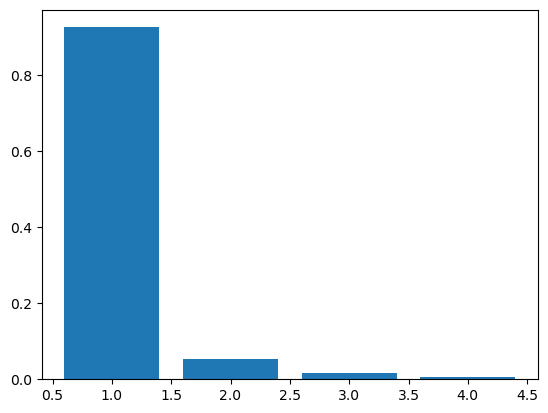

In [56]:
exp_var =iris_eigvals/sum(iris_eigvals)
print("Percentage Information capture of each component: ", exp_var*100)
plt.bar(range(1,5),exp_var);

In [57]:
test_data = data[:5]
test_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [58]:
test_centered = test_data - np.mean(test_data, axis = 0)
test_centered

array([[ 0.24,  0.22,  0.  ,  0.  ],
       [ 0.04, -0.28,  0.  ,  0.  ],
       [-0.16, -0.08, -0.1 ,  0.  ],
       [-0.26, -0.18,  0.1 ,  0.  ],
       [ 0.14,  0.32,  0.  ,  0.  ]])

In [59]:
principal_component = iris_eigvecs[:2] # First two principal components are chosen for transformation
principal_component

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435]])

In [60]:
test_transformed = np.dot(principal_component, test_centered.transpose())
test_transformed

array([[-0.05765725,  0.19829475,  0.05276857, -0.03393587, -0.15947021],
       [-0.18028126,  0.20102871,  0.0118982 ,  0.21237995, -0.2450256 ]])

In [61]:
test_retrived = np.dot(principal_component.transpose(), test_transformed).transpose() + np.mean(test_data, axis=0)
test_retrived

array([[4.85398327, 3.44940775, 1.3259757 , 0.24013611],
       [4.91516293, 3.00311845, 1.40468844, 0.19775764],
       [4.87810172, 3.23667306, 1.37643791, 0.21288493],
       [4.83025688, 3.14730397, 1.54638389, 0.12040255],
       [4.8224952 , 3.56349677, 1.34651406, 0.22881877]])

### As the retrived data is nearly the same as the original data, it can be concluded that the PCA works

In [62]:
iris_centered = data - iris_mean
transformed_iris = np.dot(principal_component, iris_centered.transpose())
transformed_iris = transformed_iris.transpose()
transformed_iris

array([[ 4.91948928e-01, -1.34738775e+00],
       [ 7.47900934e-01, -9.66077783e-01],
       [ 6.02374750e-01, -1.15520829e+00],
       [ 5.15670315e-01, -9.54726544e-01],
       [ 3.90135972e-01, -1.41213209e+00],
       [ 2.26961604e-01, -1.54984681e+00],
       [ 4.08533532e-01, -1.26569150e+00],
       [ 4.63344221e-01, -1.20654781e+00],
       [ 6.32760084e-01, -8.51972101e-01],
       [ 5.92421763e-01, -9.46997776e-01],
       [ 4.11018127e-01, -1.45836908e+00],
       [ 3.32926557e-01, -1.13045222e+00],
       [ 6.80016512e-01, -9.25441458e-01],
       [ 6.73520857e-01, -1.06323244e+00],
       [ 5.32991217e-01, -1.88911577e+00],
       [ 1.23368021e-01, -2.05866728e+00],
       [ 4.59360515e-01, -1.78841404e+00],
       [ 5.23674383e-01, -1.37979718e+00],
       [ 3.69367040e-01, -1.46914680e+00],
       [ 2.68612690e-01, -1.53906908e+00],
       [ 4.91780636e-01, -1.12017175e+00],
       [ 3.65992133e-01, -1.49850728e+00],
       [ 4.77899013e-01, -1.61779177e+00],
       [ 5.

In [63]:
transformed_df = pd.DataFrame(data=transformed_iris, columns=["PC1", "PC2"])
transformed_df

,PC1,PC2
0,0.491949,-1.347388
1,0.747901,-0.966078
2,0.602375,-1.155208
3,0.515670,-0.954727
4,0.390136,-1.412132
...,...,...
145,-0.142793,0.471629
146,0.030139,0.879747
147,-0.310287,0.585311
148,-0.702403,0.340162


In [64]:
transformed_df = pd.concat([transformed_df, iris_data["Species"]], axis=1)
transformed_df

,PC1,PC2,Species
0,0.491949,-1.347388,Iris-setosa
1,0.747901,-0.966078,Iris-setosa
2,0.602375,-1.155208,Iris-setosa
3,0.515670,-0.954727,Iris-setosa
4,0.390136,-1.412132,Iris-setosa
...,...,...,...
145,-0.142793,0.471629,Iris-virginica
146,0.030139,0.879747,Iris-virginica
147,-0.310287,0.585311,Iris-virginica
148,-0.702403,0.340162,Iris-virginica


In [65]:
species_map = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
for i in range(len(transformed_df)):
    transformed_df["Species"][i] = species_map[transformed_df["Species"][i]]
transformed_df

,PC1,PC2,Species
0,0.491949,-1.347388,0
1,0.747901,-0.966078,0
2,0.602375,-1.155208,0
3,0.515670,-0.954727,0
4,0.390136,-1.412132,0
...,...,...,...
145,-0.142793,0.471629,2
146,0.030139,0.879747,2
147,-0.310287,0.585311,2
148,-0.702403,0.340162,2


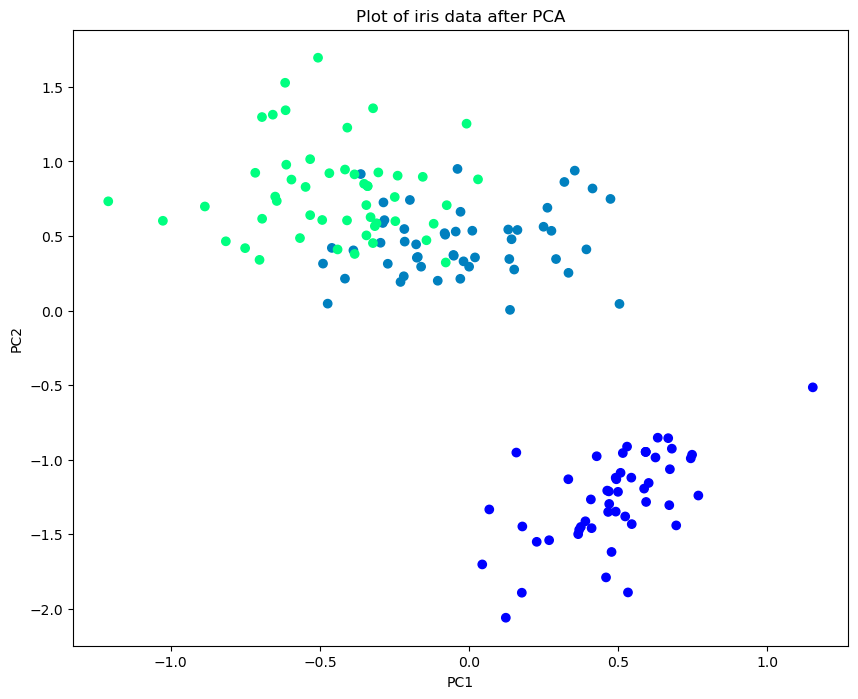

In [68]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x="PC1", y="PC2", data=transformed_df, c=transformed_df["Species"], cmap="winter")
plt.title("Plot of iris data after PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Linear Discriminant Analysis

In [69]:
iris_data = pd.read_csv("Iris.csv")
iris_data.drop("Id", axis=1, inplace=True)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [72]:
for i in range(len(iris_data)):
    iris_data["Species"][i] = species_map[iris_data["Species"][i]]
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Calculate the within class scatter matrix

In [93]:
class_feature_means = pd.DataFrame()
for c, rows in iris_data.groupby('Species'):
    class_feature_means[c] = rows.mean()
class_feature_means.drop("Species", axis=0, inplace=True)
class_feature_means

,0,1,2
SepalLengthCm,5.006,5.936,6.588
SepalWidthCm,3.418,2.770,2.974
PetalLengthCm,1.464,4.260,5.552
PetalWidthCm,0.244,1.326,2.026


In [97]:
within_class_scatter_matrix = np.zeros((4, 4))
for c, rows in iris_data.groupby("Species"):
    rows = rows.drop("Species", axis=1)
    s = np.zeros((4, 4))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(4, 1), class_feature_means[c].values.reshape(4, 1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s
within_class_scatter_matrix

array([[38.9562, 13.683 , 24.614 ,  5.6556],
       [13.683 , 17.035 ,  8.12  ,  4.9132],
       [24.614 ,  8.12  , 27.22  ,  6.2536],
       [ 5.6556,  4.9132,  6.2536,  6.1756]])

### Calculate between class scatter matrix

In [101]:
feature_means = iris_data.mean()
feature_means.drop("Species", axis=0, inplace=True)
between_class_scatter_matrix = np.zeros((4,4))
for c in class_feature_means:    
    n = len(iris_data.loc[iris_data['Species'] == c].index)
    mc, m = class_feature_means[c].values.reshape(4,1), feature_means.values.reshape(4,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
between_class_scatter_matrix

array([[ 63.21213333, -19.534     , 165.16466667,  71.36306667],
       [-19.534     ,  10.9776    , -56.0552    , -22.4924    ],
       [165.16466667, -56.0552    , 436.64373333, 186.90813333],
       [ 71.36306667, -22.4924    , 186.90813333,  80.60413333]])

### Calculate the eigenvalues and eigenvectors for Sw^-1Sb matrix

#### Sw = Within class scatter matrix
#### Sb = Between class scatter matrix

In [104]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))
i= np.argsort(eigen_values)[::-1]
eigen_vectors = eigen_vectors[:,i]
eigen_values = eigen_values[i]
print("Eigenvalues: ", eigen_values)
print("Eigenvectors: ")
print(eigen_vectors)

Eigenvalues:  [3.22719578e+01 2.77566864e-01 7.43149447e-15 3.80309934e-15]
Eigenvectors: 
[[-0.20490976 -0.00898234  0.13060654 -0.82711312]
 [-0.38714331 -0.58899857 -0.37692591  0.39387266]
 [ 0.54648218  0.25428655 -0.44176253  0.39436587]
 [ 0.71378517 -0.76703217  0.80356372 -0.07227567]]


Percentage Information capture of each component:  [9.91472476e+01 8.52752434e-01 2.28313456e-14 1.16840396e-14]


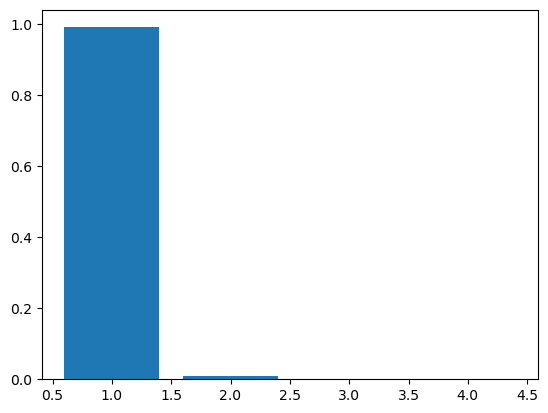

In [105]:
exp_var1 = eigen_values/sum(eigen_values)
print("Percentage Information capture of each component: ", exp_var1*100)
plt.bar(range(1,5),exp_var1);

### Selecting the first two eigenvectors for tranformation of the data

In [106]:
lda_components = eigen_vectors[:2]
lda_components

array([[-0.20490976, -0.00898234,  0.13060654, -0.82711312],
       [-0.38714331, -0.58899857, -0.37692591,  0.39387266]])

In [110]:
data = np.array(iris_data.drop("Species", axis=1))
transformed_data = np.dot(lda_components, data.transpose())
transformed_data = transformed_data.transpose()
transformed_data

array([[-1.05905143, -4.48484763],
       [-1.01357831, -4.11291968],
       [-0.98745348, -4.11559814],
       [-0.93994296, -4.09336914],
       [-1.03945869, -4.50503316],
       [-1.25035796, -4.87089329],
       [-1.03840963, -4.19298885],
       [-1.02460157, -4.42492603],
       [-0.9102252 , -3.86044817],
       [-0.91870458, -4.2488994 ],
       [-1.10926017, -4.75648293],
       [-0.97055896, -4.38518996],
       [-0.91037602, -4.11359262],
       [-0.8471031 , -3.80694319],
       [-1.23310074, -4.97496205],
       [-1.34244337, -5.20615039],
       [-1.30260058, -4.72012293],
       [-1.14176274, -4.44546036],
       [-1.22822134, -4.9675237 ],
       [-1.13139679, -4.65985253],
       [-1.08044416, -4.65516854],
       [-1.21320987, -4.5615654 ],
       [-1.0097374 , -4.19940547],
       [-1.26620694, -4.36196389],
       [-0.931377  , -4.49826774],
       [-1.00794798, -4.2270192 ],
       [-1.17696354, -4.38384409],
       [-1.06648175, -4.56125455],
       [-1.07864417,

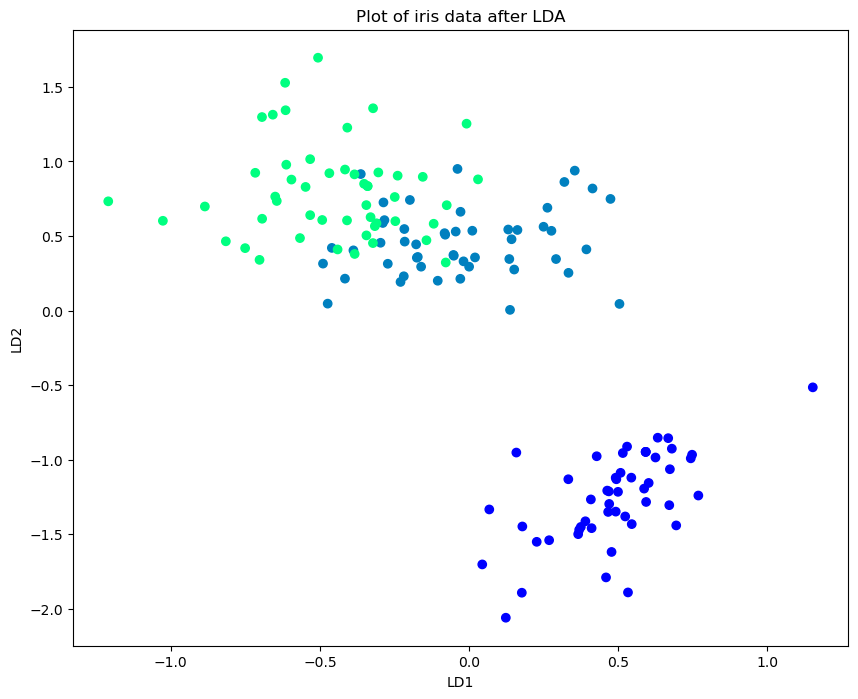

In [113]:
transformed_df = pd.DataFrame(data=transformed_iris, columns=["LD1", "LD2"])
transformed_df = pd.concat([transformed_df, iris_data["Species"]], axis=1)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x="LD1", y="LD2", data=transformed_df, c=transformed_df["Species"], cmap="winter")
plt.title("Plot of iris data after LDA")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()